# GERMAN DATASET

Vamos a descargar el German dataset y aplicaremos una serie de algoritmos para ver su performance.

## INDICE
 + INTRODUCCIÓN
 + UPLOAD THE DATASET
 + EXPLORE THE DATASET
     + VISUALIZACION DE CATEGORIAS
     + ANALISIS DE Nº DE IMAGENES POR CATEGORIA
     + ANALISIS DE CATEGORAIS ESPECIALES

## 1 INTRODUCCIÓN

Los archivos se encuentran en: http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
Este dataset contiene 43 clases (43 tipos de señales).  
Descargamos dos archivos:  
+ GTSRB_Final_Training_Images
+ GTSRB_Final_Test_Images

Los archivos deben descomprimirse. 
El archivo de training esta organizado por clases en 43 carpetas
Cada carpeta contiene un determinado número de archivos .ppm (imágenes) y un archivo .csv .  

Nos basaremos en el artículo de Waleed Abdulla para el Belgium dataset y lo intentaremos aplicar al german dataset.
También tenemos un articulo de Alex Staravoitau en el que aplica algunas técnicas de data augmentation para luego aplicar una Deep Neural Net: https://navoshta.com/traffic-signs-classification/
El notebook original de jupyter está en github:  
https://github.com/navoshta/traffic-signs

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import csv

# Allow image embeding in notebook
%matplotlib inline

## 2. UPLOADING THE DATASET

In [2]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    labels = []
    images = []
    #print(directories)
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    #print(label_dir)
    return images, labels

In [3]:
train_data_dir = ".\\data\\Training"            
X_train_orig, Y_train_orig = load_data(train_data_dir)
#print(Y_train_orig)

Los archivos de TEST no están igual ordenados, en este caso no tenemos las imágenes guardadas en carpetas que nos indican la clase del conjunto.  
En este caso tenemos un archivo .csv que contiene las clases de las imágenes.  
Vamos a intentar leer el archivo y meterlo en un Pythonlist.

In [4]:
def load_test_data (data_dir):
    labels  = []
    labels2 =[]
    images = []
    
    with open('GT-final_test.csv', 'r') as f:
      reader = csv.reader(f)
      labels = list(reader)
    #print(labels)
    for d in range(1,len(labels)):
        labels2.append(int(labels[d][0]))
    #print(len(labels))
    
    file_names = [os.path.join(data_dir, f) 
                  for f in os.listdir(data_dir) if f.endswith(".ppm")]
    for f in file_names:
        images.append(skimage.data.imread(f))
    
    return images,labels2

Primer modificacmos manualmente el archivo original del German dataset para solo dejar la columna del IDclass.  
Lo movemos al mismo directorio que este archivo de trabajo.  
Y finalmente para darle el mismo formato que los otros vectores Y lo repasamos con un for y eleminamos la primera columna que era la de IDclass.  
Ahora necesitamos subir todas las imágenes en una Python List.
Modificando un poco el código original de Waleed Abdulla conseguimos meterlo.

OTRAs FORMA DE HACERLO:  
signnames = read_csv("GT-final_test.csv")  
print(signnames)  
print(type(signnames))  

In [5]:
test_data_dir = ".\\data\\Testing" 
X_test_orig, Y_test_orig = load_test_data(test_data_dir)

## 3 EXPLORANDO EL DATASET  
  
La web del dataset nos da la siguientes datos:  
+ 39.209 imágenes en el training set con 43 clases
+ 12.630 imágenes en el test set.

Hemos importado el dataset en una lista de Python de 39209 instancias.  
Cada instancia es un array de 3 dimensiones.  
Las dos primeras dimensiones son el número de pixels en X e Y.  
La tercra dimensión es siempre 3 y se trata del color en RGB.

In [6]:
print("ARRAY DE LABELS TRAIN")
print("Tipo de objeto Python: " , type(Y_train_orig))
print("Número de imágenes totales: ", len(Y_train_orig))
print("Número de clases totales: ", len(set(Y_train_orig)))
print(Y_train_orig)

ARRAY DE LABELS TRAIN
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  39209
Número de clases totales:  43
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Imprimiendo el array de labels vemos que están ordenados según su clase, habrá que tenerlo en cuenta.

In [7]:
print("ARRAY DE IMÁGENES TRAIN")
print("Tipo de objeto Python: ",type(X_train_orig))
print("Número de imágenes totales: ",len(X_train_orig))
print("Dimensiones de la primera imagen: ", X_train_orig[0].shape)
print("Parámetros RGB del primer pixel: ", X_train_orig[0][0][0])
X_train_orig

ARRAY DE IMÁGENES TRAIN
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  39209
Dimensiones de la primera imagen:  (30, 29, 3)
Parámetros RGB del primer pixel:  [75 78 80]


[array([[[ 75,  78,  80],
         [ 74,  76,  78],
         [ 86,  87,  84],
         ...,
         [ 68,  75,  75],
         [ 65,  69,  68],
         [ 66,  67,  66]],
 
        [[ 83,  84,  86],
         [ 80,  80,  82],
         [ 90,  89,  84],
         ...,
         [ 73,  77,  78],
         [ 76,  78,  75],
         [ 80,  80,  78]],
 
        [[ 78,  78,  80],
         [ 86,  85,  86],
         [ 93,  90,  91],
         ...,
         [ 72,  74,  72],
         [ 73,  74,  69],
         [ 78,  78,  74]],
 
        ...,
 
        [[133, 134, 139],
         [122, 127, 132],
         [112, 121, 124],
         ...,
         [ 94,  94,  89],
         [ 97,  98,  91],
         [ 99, 103,  99]],
 
        [[ 91,  95,  99],
         [ 91,  98, 103],
         [ 74,  85,  89],
         ...,
         [103, 101,  95],
         [110, 113, 104],
         [ 96, 104,  98]],
 
        [[ 85,  84,  87],
         [ 95, 101, 107],
         [ 61,  74,  79],
         ...,
         [102, 102,  95],
  

In [8]:
print("ARRAY DE LABELS TEST")
print("Tipo de objeto Python: " , type(Y_test_orig))
print("Número de imágenes totales: ", len(Y_test_orig))
print("Número de clases totales: ", len(set(Y_test_orig)))
print(Y_test_orig)

ARRAY DE LABELS TEST
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  12630
Número de clases totales:  43
[16, 1, 38, 33, 11, 38, 18, 12, 25, 35, 12, 7, 23, 7, 4, 9, 21, 20, 27, 38, 4, 33, 9, 3, 1, 11, 13, 10, 9, 11, 5, 17, 34, 23, 2, 17, 3, 12, 16, 8, 7, 30, 18, 12, 24, 25, 3, 10, 18, 8, 25, 13, 15, 9, 13, 35, 5, 26, 9, 16, 38, 10, 4, 9, 15, 9, 26, 2, 5, 28, 11, 25, 30, 34, 5, 12, 1, 10, 25, 25, 21, 33, 25, 7, 10, 35, 3, 7, 22, 13, 3, 1, 2, 14, 12, 32, 3, 38, 9, 33, 1, 10, 5, 11, 33, 4, 35, 25, 33, 4, 1, 14, 16, 10, 30, 3, 27, 29, 1, 17, 13, 7, 1, 8, 2, 10, 10, 30, 1, 6, 36, 3, 14, 13, 11, 10, 18, 40, 2, 38, 41, 4, 6, 18, 17, 25, 2, 41, 11, 21, 7, 24, 11, 25, 17, 3, 6, 9, 7, 4, 13, 16, 4, 25, 18, 9, 13, 14, 29, 17, 13, 38, 26, 25, 33, 1, 3, 40, 13, 2, 8, 4, 36, 25, 20, 25, 18, 1, 10, 8, 10, 29, 12, 38, 31, 2, 8, 38, 18, 28, 17, 9, 4, 1, 17, 9, 2, 31, 13, 15, 15, 38, 25, 5, 25, 13, 10, 5, 4, 10, 2, 4, 5, 1, 14, 12, 12, 5, 8, 36, 25, 13, 33, 18, 33, 19, 12, 30, 4, 18,

In [9]:
print("ARRAY DE IMÁGENES TEST")
print("Tipo de objeto Python: ",type(X_test_orig))
print("Número de imágenes totales: ",len(X_test_orig))
X_test_orig

ARRAY DE IMÁGENES TEST
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  12630


[array([[[115, 138, 173],
         [116, 138, 172],
         [116, 137, 169],
         ...,
         [ 86, 110, 135],
         [ 80, 101, 126],
         [ 63,  82, 105]],
 
        [[118, 143, 178],
         [116, 140, 177],
         [115, 138, 174],
         ...,
         [120, 142, 171],
         [119, 139, 167],
         [117, 136, 166]],
 
        [[116, 143, 177],
         [113, 139, 174],
         [115, 140, 174],
         ...,
         [120, 141, 173],
         [119, 139, 169],
         [120, 139, 171]],
 
        ...,
 
        [[116, 136, 167],
         [116, 136, 165],
         [114, 134, 168],
         ...,
         [117, 136, 165],
         [116, 138, 165],
         [114, 140, 168]],
 
        [[114, 135, 167],
         [114, 135, 165],
         [111, 133, 165],
         ...,
         [117, 137, 166],
         [115, 139, 168],
         [111, 140, 170]],
 
        [[112, 135, 168],
         [110, 134, 165],
         [110, 135, 165],
         ...,
         [118, 139, 168],
  

### 2.1 CATEGORIAS

In [10]:
f = open('DEFINED.txt','r')
IMAGES_REF_ORIG = [x.rstrip("\n") for x in f]
f.close
#IMAGES_REF_ORIG

<function TextIOWrapper.close>

In [11]:
IMAGES_REF = []
images_ref_dir = ".\data\img" 
for img in IMAGES_REF_ORIG:
    a=img+ ".png"
    IMAGES_REF.append(os.path.join(images_ref_dir, a))
    
#len(IMAGES_REF)

In [12]:
def display_images_ref(images,labels):
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    print(len(unique_labels))
    for label in unique_labels:
        image = images[i-1]
        plt.subplot(8, 8, i)
        plt.axis('off')
        plt.title("Cat {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    
    plt.show()

D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


43
43


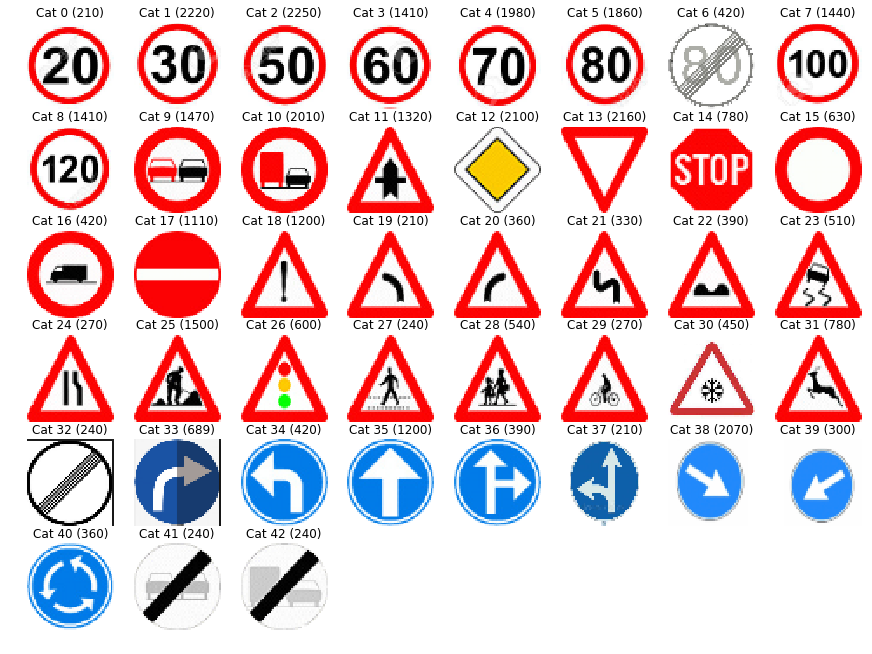

In [13]:
def load_data_img(names):
    i=0
    images = []
    for img in names: 
        #print(img)
        
        img2=(skimage.data.imread(img))
        images.append(skimage.transform.resize(img2, (50, 50)))
        #plt.figure()
        #plt.imshow(images[i])
        #i=i+1
    return images

     
images_ref = load_data_img(IMAGES_REF)
print(len(images_ref))
#print(len(Y_train_orig))
display_images_ref(images_ref,Y_train_orig)

In [32]:
def display_images_and_labels(images,labels):
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        image = images[labels.index(label)]
        plt.subplot(8, 8,i)
        plt.axis('off')
        plt.title("Cat. {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    
    plt.show()

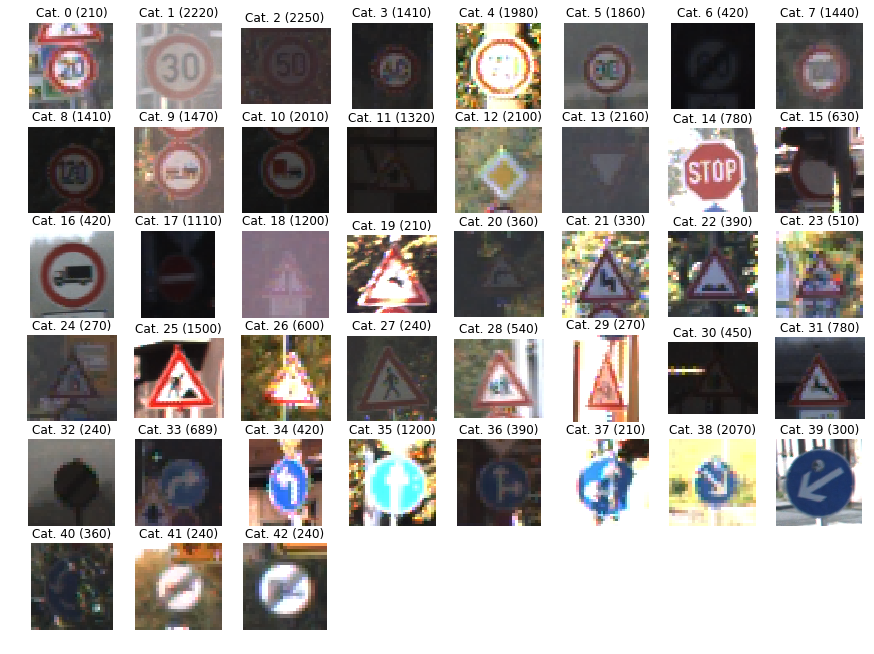

In [33]:
display_images_and_labels(X_train_orig,Y_train_orig)

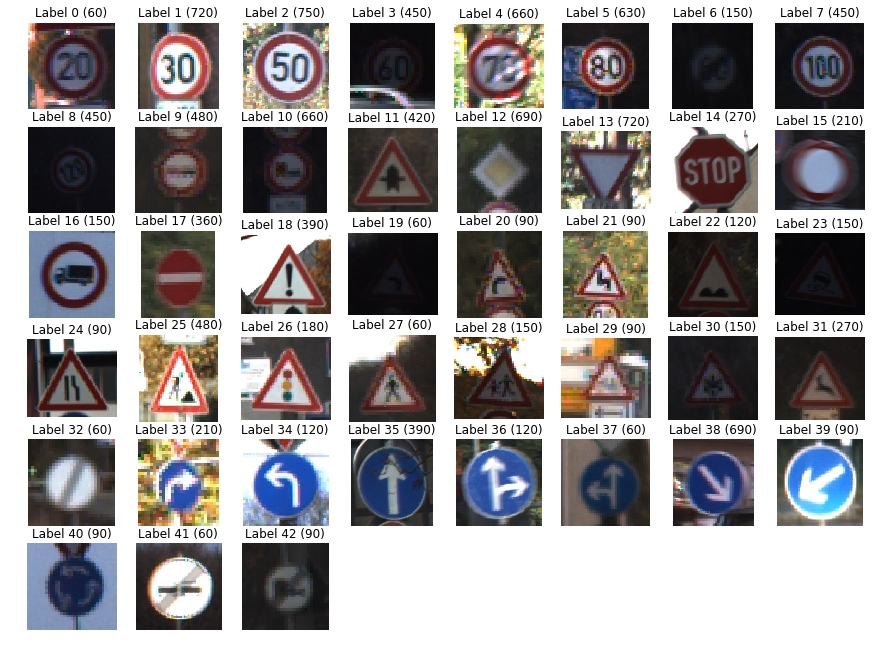

In [16]:
display_images_and_labels(X_test_orig,Y_test_orig)

Podemos extraer las siguientes conclusiones:  
+ Tenemos 42 categorias.
+ El número de ejemplos por categoria es muy dispar
+ Las imágenes están muy bien encuadradas
+ La calidad de las imágenes no parece muy buena
+ No todas las imágenes tienen el mismo tamaño
+ La calidad de alguna de las imágenes deja que desear
+ En el primer ejemplo vemos que aparecen parte de otra señal y eso puede ser un problema

A primera vista vemos que el número de imágenes por categoria es muy dispar, pero exactamente cuantas imágenes por categorai hay.  
Vamos a plotear un grafico con el nº de imágnes por categoria.

### 2.2 NÚMERO DE IMÁGENES POR CATEGORIA

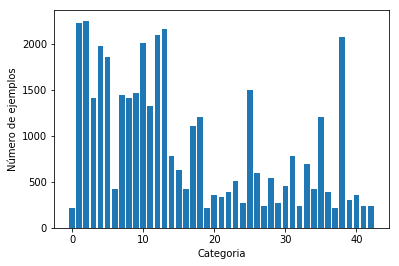

In [17]:
unique_labels = set(Y_train_orig)
#creamos una lista
labels_count_y=[]
labels_count_x=[]

#con un for recorremos todas las categorias y metemos el número de imágenes
#en cada categoria en la lista labels_count
for i in unique_labels:
    labels_count_y.append(Y_train_orig.count(i))
    if Y_train_orig.count(i) != 0:
        labels_count_x.append(i)
    
#ploteamos esta lista como diagrama
#print('labels_count_x',labels_count_x)
#print(len(labels_count_x))
#print('labels_count_y',labels_count_y)
#print(len(labels_count_y))
x=list(range(42))
plt.bar(labels_count_x,labels_count_y)
plt.xlabel('Categoria')
plt.ylabel('Número de ejemplos')
plt.show()

Parece que hay algunas categorias subrepresentadas.

In [18]:
def display_categorias_menores_de_X(cat):
    unique_labels = set(Y_train_orig)
    #creamos una lista
    labels_count_y=[]
    labels_count_x=[]
    images_count=[]

    #con un for recorremos todas las categorias y metemos el número de imágenes
    #en cada categoria en la lista labels_count
    x=0
    for i in unique_labels:
        if Y_train_orig.count(i) < cat:
            labels_count_y.append(Y_train_orig.count(i))
            labels_count_x.append(i)

    #x=list(range(61))
    plt.bar(labels_count_x,labels_count_y)
    plt.xlabel('Categoria')
    plt.ylabel('Número de ejemplos')
    plt.title('CATEGORIAS CON MENOS DE '+str(cat)+' IMAGENES')
    plt.show()

    print('\n CATEGORIAS CON MENOS DE ',str(cat),' IMAGENES: ',labels_count_x)
    print('\n HAY UN TOTAL DE ',len(labels_count_x),'CATEGORIAS CON MENOS DE ',str(cat),'IMAGENES')
    
    plt.figure(figsize=(15, 15))
    i = 1
    for label in labels_count_x:
        image = X_train_orig[Y_train_orig.index(label)]
        plt.subplot(8, 8, i)
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, Y_train_orig.count(label)))
        i += 1
        _ = plt.imshow(image)
    
    plt.show()

Vamos a ver las categorias con menos de 500 imágenes

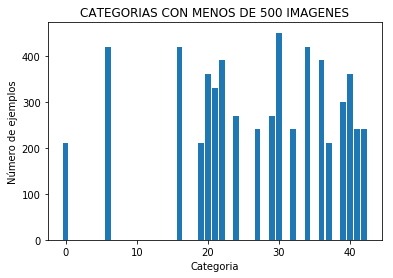


 CATEGORIAS CON MENOS DE  500  IMAGENES:  [0, 6, 16, 19, 20, 21, 22, 24, 27, 29, 30, 32, 34, 36, 37, 39, 40, 41, 42]

 HAY UN TOTAL DE  19 CATEGORIAS CON MENOS DE  500 IMAGENES


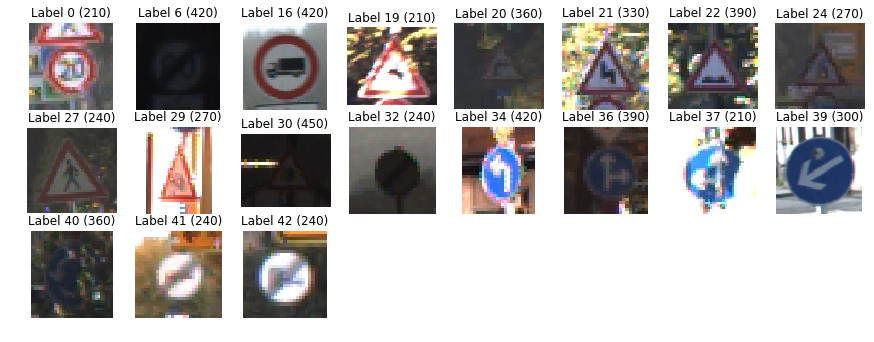

In [19]:
display_categorias_menores_de_X(cat=500)

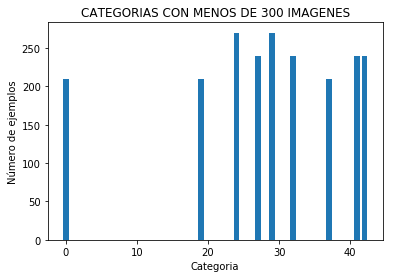


 CATEGORIAS CON MENOS DE  300  IMAGENES:  [0, 19, 24, 27, 29, 32, 37, 41, 42]

 HAY UN TOTAL DE  9 CATEGORIAS CON MENOS DE  300 IMAGENES


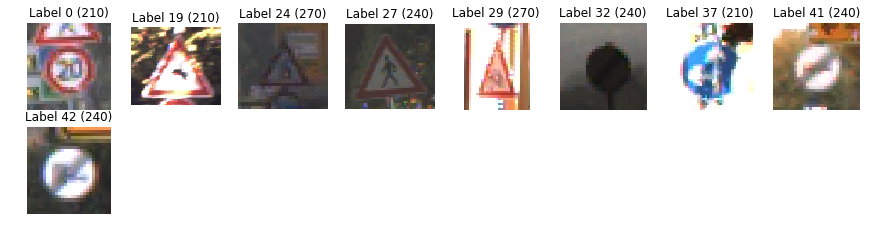

In [20]:
display_categorias_menores_de_X(cat=300)

### ANÁLISIS POR CATEGORÍAS

In [21]:
def display_label_images(images, labels, label, salto):
    #AÑADO UNA PEQUEÑA MODIFICACIÓN AL CÓDIGO DE W.A.
    #CON EL ARGUMENTO SALTO PODEMOS ABARCAR NO SOLO LAS 32 PRIMERAS IMÁGENES
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for c in range(start,end,salto):
        if i <= limit:
            plt.subplot(3, 8, i)  # 3 rows, 8 per row
            plt.axis('off')
            i += 1
            image=images[c]
            plt.imshow(image)
    plt.show()

En la categoria 0, tenemos  210 ejemplos.


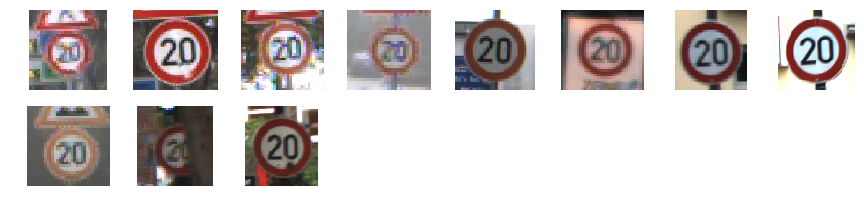

In [22]:
print('En la categoria 0, tenemos ', Y_train_orig.count(0), 'ejemplos.')
display_label_images(X_train_orig, Y_train_orig, label=0, salto=20)

En la categoria 30, tenemos  450 ejemplos.


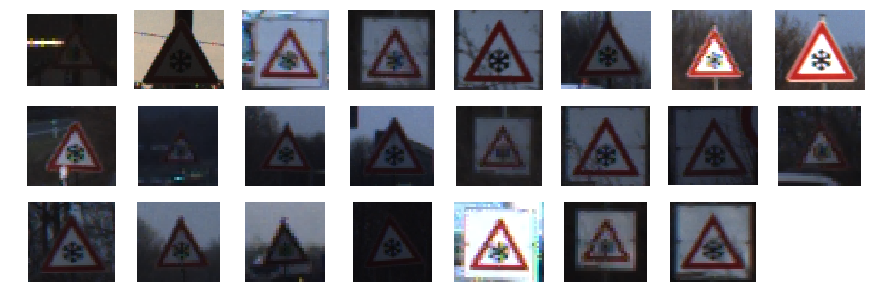

In [23]:
print('En la categoria 30, tenemos ', Y_train_orig.count(30), 'ejemplos.')
display_label_images(X_train_orig, Y_train_orig, label=30, salto=20)

En esta categoria vemos que las imágenes son muy oscuras.

Hemos detectado que hay varias categorias con señales de velocidad, vemos a ver cuales son y a que se refieren

En la categoria  1 , tenemos  2220 ejemplos.


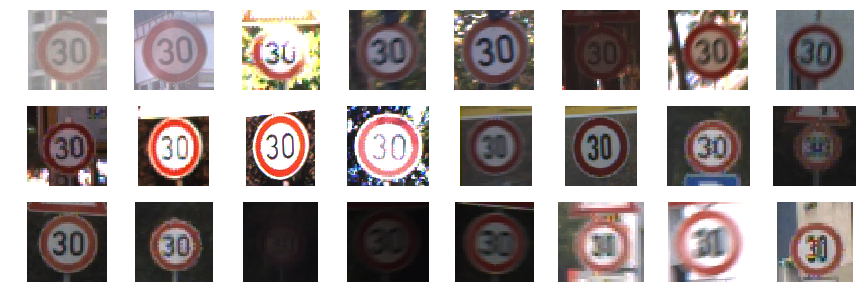

En la categoria  2 , tenemos  2250 ejemplos.


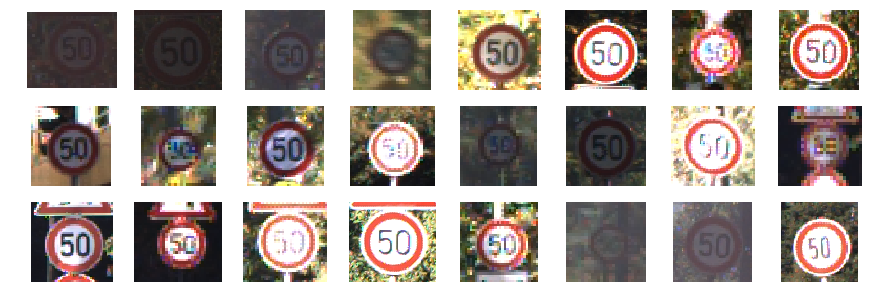

En la categoria  3 , tenemos  1410 ejemplos.


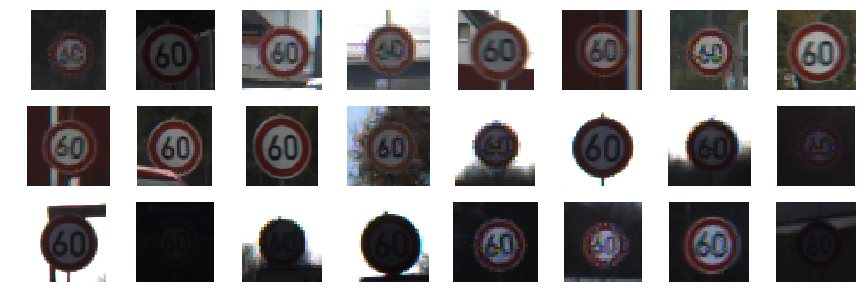

En la categoria  4 , tenemos  1980 ejemplos.


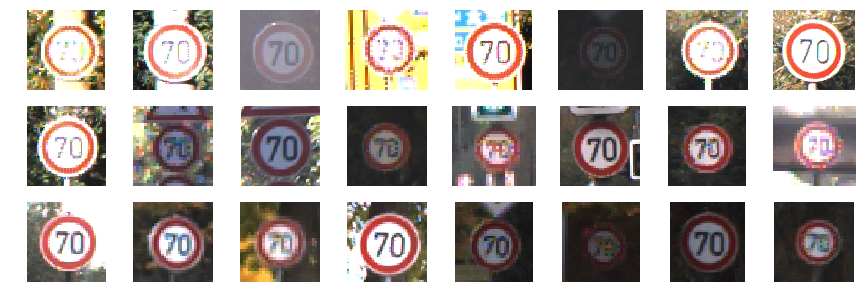

En la categoria  5 , tenemos  1860 ejemplos.


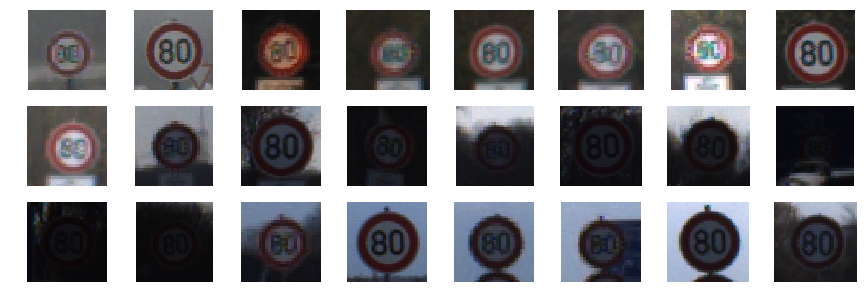

En la categoria  6 , tenemos  420 ejemplos.


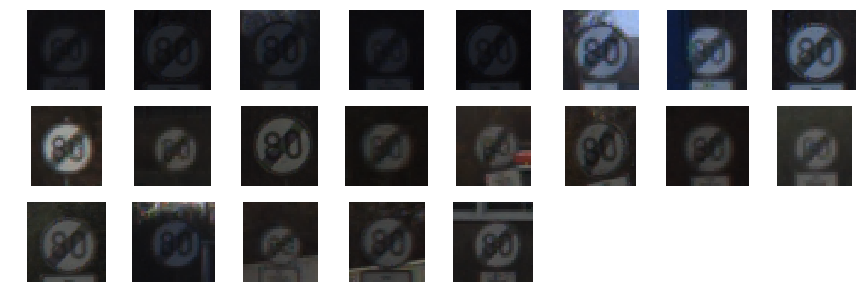

En la categoria  7 , tenemos  1440 ejemplos.


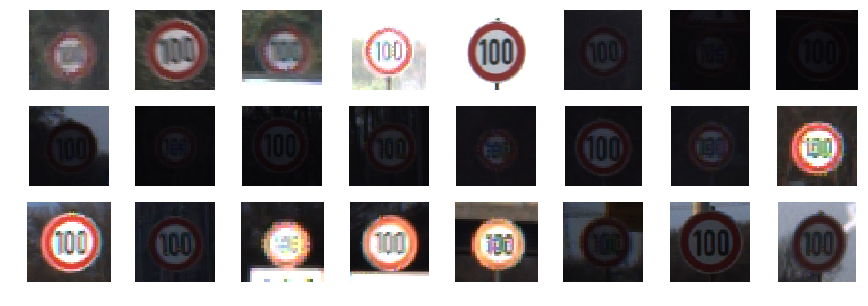

En la categoria  8 , tenemos  1410 ejemplos.


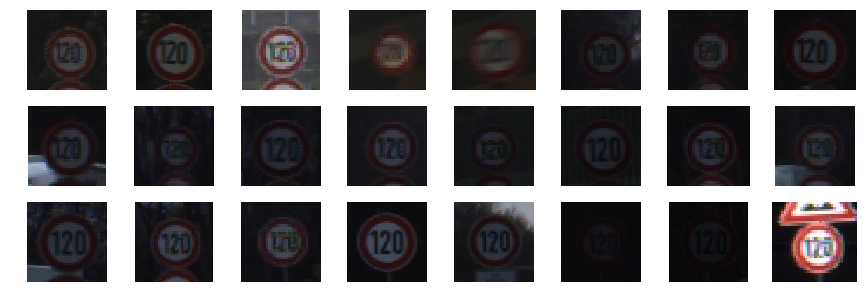

In [24]:
for i in range(1,9):
    print("En la categoria ",i,", tenemos ", Y_train_orig.count(i), 'ejemplos.')
    display_label_images(X_train_orig, Y_train_orig, label=i, salto=20)

Vemos que hay 8 categorias con señales de velocidad de las cuales una de ellas es de no adelantar que vemos que está un poco subrepresentada.  
De forma general las señales son un poco obscuras o de veisibilidad reducida y en algunas de ellas hay partes de otras señales.

## "RESIZING" DE LAS IMÁGENES

Necesitamos que todas las imágenes tengan el mismo tamaño. Vamos a ver que tamaños tienen nuestras imágenes origianles.

In [25]:
images_shape=[]

for image in X_train_orig:
    images_shape.append(image.shape)

#print(images_shape)

print('El tamaño máximo de nuestras imágenes es: ', max(images_shape))
print('El tamaño mínimo de nuestras imágenes es: ', min(images_shape))

El tamaño máximo de nuestras imágenes es:  (225, 243, 3)
El tamaño mínimo de nuestras imágenes es:  (25, 25, 3)


D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


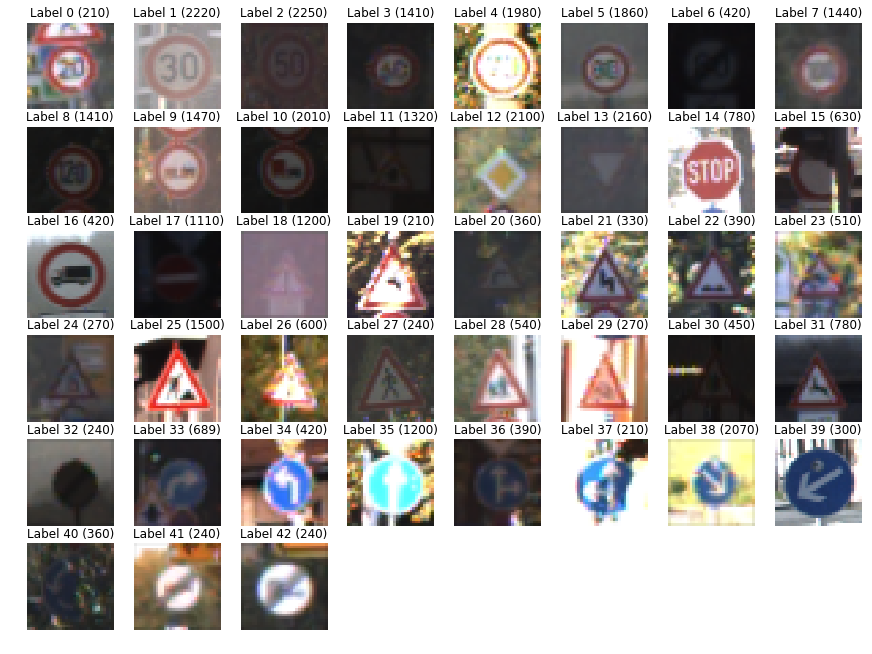

In [26]:
# Resize images
images32 = [skimage.transform.resize(image, (32, 32))
                for image in X_train_orig]
display_images_and_labels(images32, Y_train_orig)

Vemos que todas las imágenes tienen el mismo tamaño

In [27]:
images_shape=[]

for image in images32:
    images_shape.append(image.shape)

#print(images_shape)

print('El tamaño máximo de nuestras imágenes es: ', max(images_shape))
print('El tamaño mínimo de nuestras imágenes es: ', min(images_shape))

El tamaño máximo de nuestras imágenes es:  (32, 32, 3)
El tamaño mínimo de nuestras imágenes es:  (32, 32, 3)


Otro tema importante es que los valores RGB varian entre 0 y 255 para nuestros modelos nos interesa que estén normalizados entre 0 y 1.

In [28]:
print('Las 5 primeras imágenes originales tienen los siguientes valores max y min de RGB: ')
i=1
for image in X_train_orig[:5]:
    print('Valor max de la imagen',i, image.max())
    print('Valor min de la imagen',i, image.min())
    i += 1

Las 5 primeras imágenes originales tienen los siguientes valores max y min de RGB: 
Valor max de la imagen 1 255
Valor min de la imagen 1 31
Valor max de la imagen 2 255
Valor min de la imagen 2 38
Valor max de la imagen 3 255
Valor min de la imagen 3 40
Valor max de la imagen 4 255
Valor min de la imagen 4 28
Valor max de la imagen 5 255
Valor min de la imagen 5 27


Una vez hemos modificado el tamaño de las imágenes nos queda de la siguiente manera

In [29]:
print('Las 5 primeras imágenes modificadas tienen los siguientes valores max y min de RGB: ')
i=1
for image in images32[:5]:
    print('Valor max de la imagen',i, image.max())
    print('Valor min de la imagen',i, image.min())
    i+=i

Las 5 primeras imágenes modificadas tienen los siguientes valores max y min de RGB: 
Valor max de la imagen 1 1.0
Valor min de la imagen 1 0.21001838235294307
Valor max de la imagen 2 1.0
Valor min de la imagen 2 0.20799632352941183
Valor max de la imagen 4 1.0
Valor min de la imagen 4 0.19660309436274584
Valor max de la imagen 8 1.0
Valor min de la imagen 8 0.14530867034313724
Valor max de la imagen 16 1.0
Valor min de la imagen 16 0.17365196078431333


Vemos que los valores RGB se han normalizado con el resizing